# БФБО-05-23 Баранов Арсений Юрьевич

## Практика № 6 «Математическое моделирование»
Напишите программы с использованием Python или C# для решения
следующих задач:
1. Дана система линейных алгебраических уравнений с трехдиагональной
матрицей A (n=4):  
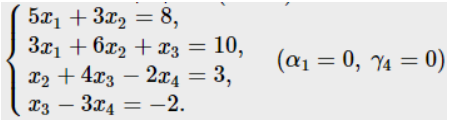  
Решить эту систему методом прогонки

In [1]:
import numpy as np

def thomas_algorithm(a, b, c, d):
    n = len(d)
    p = np.zeros(n)
    q = np.zeros(n)

    # Прямой ход
    p[0] = -c[0] / b[0]
    q[0] = d[0] / b[0]
    for i in range(1, n):
        denom = b[i] + a[i] * p[i - 1]
        p[i] = -c[i] / denom
        q[i] = (d[i] - a[i] * q[i - 1]) / denom

    # Обратный ход
    x = np.zeros(n)
    x[-1] = q[-1]
    for i in range(n - 2, -1, -1):
        x[i] = p[i] * x[i + 1] + q[i]

    return x

# Коэффициенты для первой системы уравнений
a = [0, -1, -1, -1]  # поддиагональ
b = [1, 2, 1, 1]     # главная диагональ
c = [2, -1, -1, 0]   # наддиагональ
d = [5, 3, 3, 7]     # правая часть

# Решаем систему
solution = thomas_algorithm(a, b, c, d)
print("Решение первой системы уравнений:", solution)


Решение первой системы уравнений: [ 25. -10. -48. -41.]


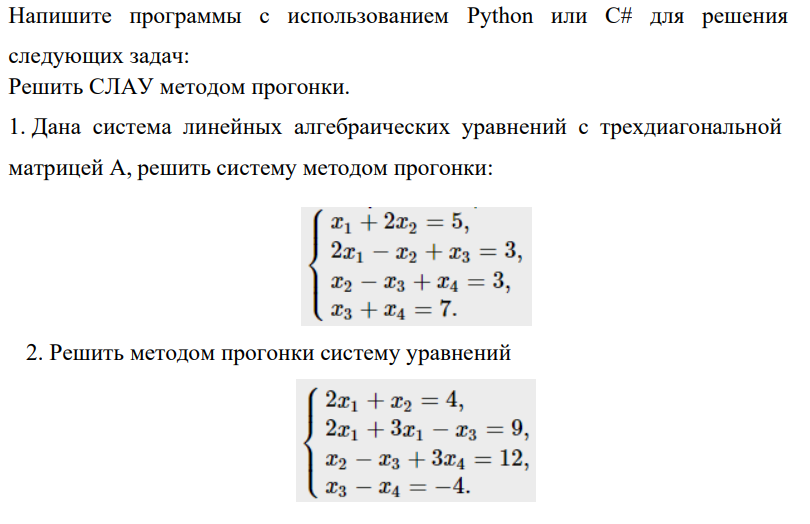

In [2]:
# Коэффициенты для второй системы уравнений
a = [0, 1, -3, -3]   # поддиагональ
b = [2, 3, 3, 3]     # главная диагональ
c = [1, 1, 3, 0]     # наддиагональ
d = [4, 9, 12, -4]   # правая часть

# Решаем систему
solution_2 = thomas_algorithm(a, b, c, d)
print("Решение второй системы уравнений:", solution_2)

Решение второй системы уравнений: [1.27777778 1.44444444 3.38888889 2.05555556]
